# 「十人十色」という四文字熟語をバカ真面目に計算してみた

まず「十人十色」という四文字熟語の意は「考え・好み・性質などが、人によってそれぞれに異なること。」（goo辞書）というのは言わずもがなではあるが、実際十人を調べて、それが十色だったという事実は皆性質が異なると言い張るにはいささか甘い検定ではないかと理系的に思う。
そこで、「十人十色」という事象が発生した日本（人口1億2000万人）において、その色のバラエティの豊かさについて考察する。

本来この考察をするには色（性質、思考）のバラエティを横軸にとって、そうなる確率を示すべきではあるが、その場合どの色をどのくらいの人が共有するかを議論せねばならず、話が広がりすぎる。そこで簡単にするため、どの色も同じだけ共有する人口があると大胆な仮定を置く。つまり、ある考え方をする人の人数ははほかの考え方をする人の人数と変わらないという在りそうで無いような仮定だ。  そのうえで、Nを総人口、Scを同じ色を持つ人の数として定義する。すると、十人十色となる確率は？

# $p(十人十色|S_c; N)= \prod_{i=0}^9 \frac{N - iS_c}{N -i}$

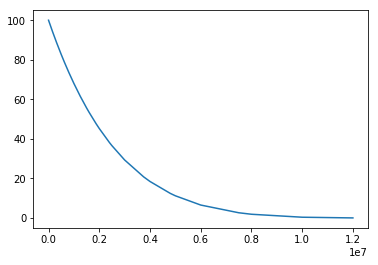

In [26]:
def juuninntoiro(N, Sc):
    p = 1
    for i in range(10):
        p *= (N-i*Sc)/(N - i)
    return p


data = []
N = 120000000
for sc in range(1, N):
    if N%sc != 0:
        continue
    if N//sc < 10:
        continue
    data.append((N, sc, juuninntoiro(N, sc)))

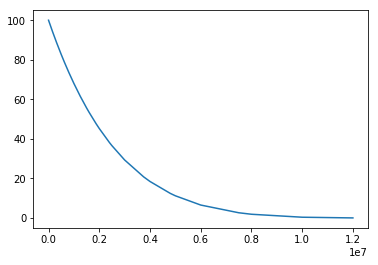

In [27]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array(data)
#print(data)

plt.plot(data[:,1], data[:,2]*100)
plt.show()

## 要するに、全員違う考えなら100％十人十色になって、そうじゃないなら徐々に100%から小さくなっていく

正直このグラフからわかることは至って当たり前のことだ。しかし、今回知りたいのはこのグラフではない。知りたいのは「十人十色だと分かったときのScの値の確からしさ」つまり、$p(Sc | 十人十色 ; N)$である。

ここでベイズの法則の出番なわけだ。$p(Sc)=const$と置けば（実はかなりここも大胆な仮定）ベイズを用いてこの式は

# $p(S_c | 十人十色) = \frac{p(十人十色 | S_c)}{\sum_{Sc}^{} p(十人十色 | S_c)}$

という簡単な式が登場する

In [2]:
sum = data.sum()

In [3]:
sum

18450608487.82967

In [4]:
sum = data[:,2].sum()

In [5]:
sum

135.8296691732794

In [15]:
integral = 0
result = 0
for i in range(len(data)):
    tmp = data[i][2]/sum
    if integral+tmp >= 0.6:
        result = i
        break
    integral += tmp
print(result, integral, data[result])

81 0.595929326726 [  1.20000000e+08   1.25000000e+04   9.95322303e-01]


In [21]:
def how_many_num(range_per):
    integral = 0
    result = 0
    global data, sum
    for i in range(len(data)):
        tmp = data[i][2]/sum
        if integral+tmp >= range_per/100:
            result = i
            break
        integral += tmp
    print(result, integral, data[result])

# 「台風の天気予報でよく見るアレ」的表現

この下の数値が表すのは「〇％の範囲では最大どのくらいの$S_c$をとり得るか」というものだ。分かりやすい例では、台風が70％の確率で進む範囲を示す円に近い。つまり、50%の確率の範囲では最大で3840人の同じ色を持つ人がいることが予想できる。これを大きいとみるか小さいとみるかは人それぞれだが、やはり十人十色という事象のみで全員違うというのはいささか言い過ぎというのはわかる。

In [22]:
for i in np.arange(0,100,10):
    print("{}%".format(i))
    how_many_num(i)

0%
0 0 [  1.20000000e+08   1.00000000e+00   1.00000000e+00]
10%
13 0.095707791267 [  1.20000000e+08   2.50000000e+01   9.99991000e-01]
20%
27 0.198775486011 [  1.20000000e+08   1.28000000e+02   9.99952376e-01]
30%
40 0.294474363047 [  1.20000000e+08   4.80000000e+02   9.99820389e-01]
40%
54 0.397513294661 [  1.20000000e+08   1.50000000e+03   9.99438011e-01]
50%
67 0.49313597807 [  1.20000000e+08   3.84000000e+03   9.98561265e-01]
60%
81 0.595929326726 [  1.20000000e+08   1.25000000e+04   9.95322303e-01]
70%
95 0.698148218698 [  1.20000000e+08   3.84000000e+04   9.85689149e-01]
80%
109 0.798673601345 [  1.20000000e+08   1.20000000e+05   9.55860971e-01]
90%
123 0.893901658201 [  1.20000000e+08   3.75000000e+05   8.67588983e-01]


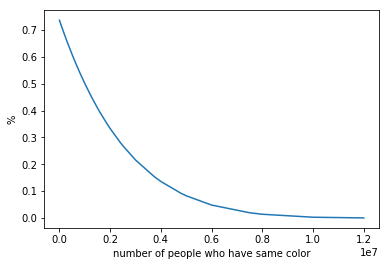

In [24]:
%matplotlib inline
plt.plot(data[:,1],data[:,2]/sum*100)
plt.xlabel("number of people who have same color")
plt.ylabel("%")
plt.show()

ちょっと考えれば当たり前のことだがグラフの形そのものは先述のものと全く変わらない。変わったのは縦軸のスケールだけ

In [28]:
print(data[0,2]/sum)

0.00736216178753


# つまりは、「十人十色」という事象で「全員違う色を持つ」と言える確率はわずか0.7％ちょいである。

以上